# RPE Factor Analysis

Following procedure in R found in https://lhbikos.github.io/ReC_Psychometrics/PAF.html

## Install Packages

In [7]:
if(!require(psych)){install.packages('psych')}
if(!require(tidyverse)){install.packages('tidyverse')}
if(!require(MASS)){install.packages('MASS')}
if(!require(sjstats)){install.packages('sjstats')}
if(!require(apaTables)){install.packages('apaTables')}
if(!require(qualtRics)){install.packages('qualtRics')}

## Load Data

Data acquired from Rural Identity Survey sent to schools in the Cyber Pipeline program. Data is stored in a CSV file - each item is a Likert scale from 1 to 5. 

1 = Strongly Disagree
2 = Disagree
3 = Neither Agree nor Disagree
4 = Agree
5 = Strongly Agree

All items are positive coded (i.e. 5 is rural, 1 is not)

In [ ]:
raw_data <- read.csv("factor_analysis.csv", header = TRUE)
# raw data

columns <- ncol(raw_data)
rows <- nrow(raw_data)

sprintf("Number of columns: %d", columns)
sprintf("Number of rows: %d", rows)

[1] "Number of columns: 13"

[1] "Number of rows: 106"

## Create Correlation Matrix

All work can be done using the correlation matrix of the data. The goal is to reproduce this at the end via the extraction of factors.

In [9]:
corr_matrix <- cor(raw_data)
round(corr_matrix, 2)

,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q2_8,Q2_9,Q2_10,Q2_11,Q2_12,Q2_13
Q2_1,1.00,0.40,0.36,0.17,0.00,0.12,0.31,0.28,0.26,0.20,0.24,0.15,0.33
Q2_2,0.40,1.00,0.26,0.26,0.15,0.05,0.15,0.05,0.21,0.07,0.14,0.23,0.19
Q2_3,0.36,0.26,1.00,0.35,0.30,0.26,0.28,0.26,0.50,0.33,0.22,0.18,0.43
Q2_4,0.17,0.26,0.35,1.00,0.31,0.37,0.27,0.07,0.39,0.26,0.17,0.09,0.15
Q2_5,0.00,0.15,0.30,0.31,1.00,0.36,0.24,0.12,0.34,0.27,0.24,0.25,0.25
Q2_6,0.12,0.05,0.26,0.37,0.36,1.00,0.28,0.18,0.19,0.24,0.29,0.09,0.30
Q2_7,0.31,0.15,0.28,0.27,0.24,0.28,1.00,0.21,0.25,0.34,0.11,0.06,0.42
Q2_8,0.28,0.05,0.26,0.07,0.12,0.18,0.21,1.00,0.40,0.36,0.27,0.38,0.33
Q2_9,0.26,0.21,0.50,0.39,0.34,0.19,0.25,0.40,1.00,0.40,0.25,0.20,0.39
Q2_10,0.20,0.07,0.33,0.26,0.27,0.24,0.34,0.36,0.40,1.00,0.21,0.18,0.36


## Diagnostic Tests of Appropriateness

### KMO

Kaiser-Meyer-Olkin index of sampling adequacy should be greater than 0.5, with 0.7 and above preferred.

In [11]:
psych::KMO(corr_matrix)

Kaiser-Meyer-Olkin factor adequacy
Call: psych::KMO(r = corr_matrix)
Overall MSA =  0.8
MSA for each item = 
 Q2_1  Q2_2  Q2_3  Q2_4  Q2_5  Q2_6  Q2_7  Q2_8  Q2_9 Q2_10 Q2_11 Q2_12 Q2_13 
 0.74  0.69  0.87  0.76  0.78  0.76  0.81  0.75  0.82  0.90  0.83  0.70  0.84 

Overall KMO = 0.8, which is good. ✅

Individual items with KMO < 0.5 should be removed. None found ✅

### Bartlett's

Bartlett's checks for an identity matrix. We want to have a significant value with p < 0.05 to show that there are relationships that can be analyzed.

In [12]:
psych::cortest.bartlett(corr_matrix, n = nrow(raw_data))

$chisq
[1] 317.3184

$p.value
[1] 1.294631e-30

$df
[1] 78

Bartlett's test was significant, $\chi^2(78) = 317.318, p< 0.01$ ✅

### Determinant

The determinant of the correlation matrix should be greater than 0.00001; otherwise we may have issues with multicollinearity or singularity.

In [13]:
det(corr_matrix)

[1] 0.04164887

Determinant is 0.0416, which is greater than 0.00001. ✅

## Principal Axis Factoring

Start by selecting a reasonable number of factors and running the analysis. Goal is to get an idea of the cumulative variance explained and the number of factors to extract. Since we are theorizing a single factor, any number less than the total number of items is a good place to start.

In [37]:
initial_paf_7 <- psych::fa(corr_matrix, nfactors = 7, fm = 'pa', rotate = 'none', max.iter = 1000)
initial_paf_7

Factor Analysis using method =  pa
Call: psych::fa(r = corr_matrix, nfactors = 7, rotate = "none", max.iter = 1000, 
    fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
       PA1   PA2   PA3   PA4   PA5   PA6   PA7   h2   u2 com
Q2_1  0.54  0.50 -0.45  0.22  0.22 -0.12  0.15 0.89 0.11 4.0
Q2_2  0.36  0.22 -0.13  0.35  0.01  0.11 -0.19 0.36 0.64 3.7
Q2_3  0.62  0.01 -0.07  0.11 -0.20 -0.09 -0.06 0.45 0.55 1.4
Q2_4  0.48 -0.27 -0.04  0.34 -0.14  0.07  0.03 0.45 0.55 2.8
Q2_5  0.46 -0.27  0.21  0.11 -0.06  0.11 -0.12 0.37 0.63 2.6
Q2_6  0.52 -0.56  0.10  0.12  0.42 -0.21  0.12 0.84 0.16 3.5
Q2_7  0.57 -0.20 -0.40 -0.27  0.09  0.48  0.08 0.84 0.16 3.7
Q2_8  0.52  0.26  0.26 -0.28  0.00 -0.07  0.33 0.59 0.41 3.6
Q2_9  0.66  0.01  0.09  0.05 -0.44 -0.09  0.09 0.66 0.34 1.9
Q2_10 0.53 -0.06  0.05 -0.15 -0.13  0.02  0.13 0.35 0.65 1.5
Q2_11 0.43  0.06  0.20  0.03  0.16 -0.09 -0.04 0.27 0.73 1.9
Q2_12 0.41  0.36  0.57  0.06  0.20  0.28 -0.11 0.76 0.24 3.6
Q2_13 

_In my testing, no more than 7 factors would produce a result. I also increased the number of max iterations to 1000 to remove the warning that max iterations was exceeded_

Looking at the Eigenvalues (SS loadings), we see a 1 factor solution being supported by Kaiser's criteria (Eigenvalues > 1) under the theory that an Eigenvalue of 1 explains the same as a single variable. (Note that we have an Eigenvalue exactly 1).

We also see a 3 factor solution being supported by Joliffe's criteria (Eigenvalues > 0.7). 

Finally, we can also look at a Scree plot, which would support a 2 factor solution. 

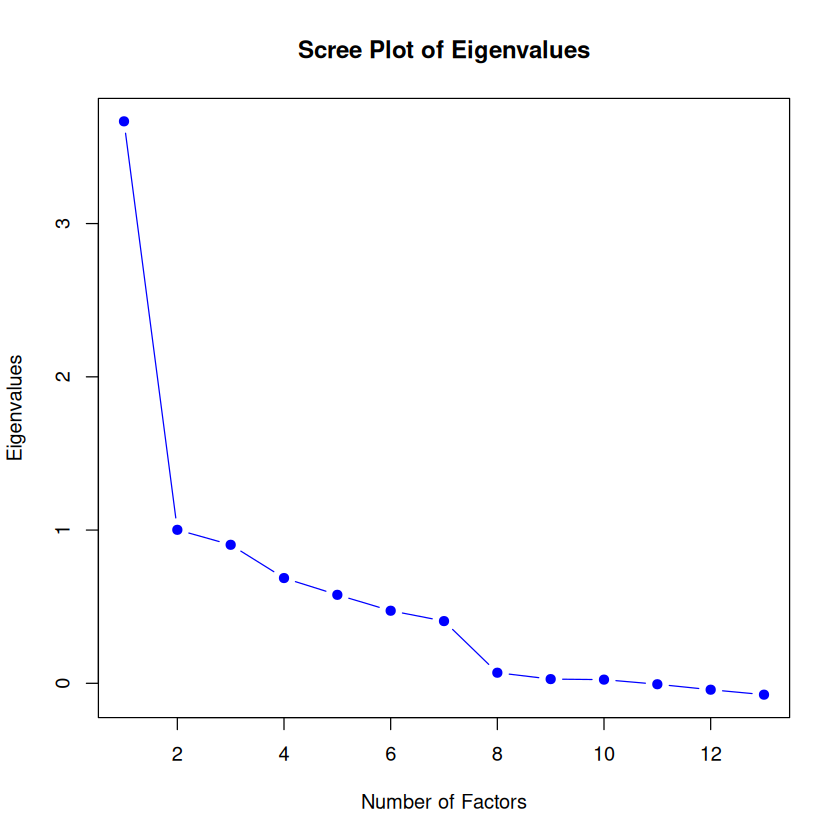

In [39]:
par(bg = "white")
plot(initial_paf_7$values, type = "b", xlab = "Number of Factors", ylab = "Eigenvalues", col = "blue", pch = 19, main = "Scree Plot of Eigenvalues")

I will analyze all 3 options and look for a parsimonious solution.

### 3 Factors

In [40]:
test_paf_3 <- psych::fa(corr_matrix, nfactors = 3, fm = 'pa', rotate = 'none', max.iter = 1000)
test_paf_3

Factor Analysis using method =  pa
Call: psych::fa(r = corr_matrix, nfactors = 3, rotate = "none", max.iter = 1000, 
    fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
       PA1   PA2   PA3   h2   u2 com
Q2_1  0.54 -0.61  0.28 0.75 0.25 2.4
Q2_2  0.36 -0.20  0.27 0.24 0.76 2.5
Q2_3  0.64  0.01  0.13 0.43 0.57 1.1
Q2_4  0.49  0.28  0.30 0.41 0.59 2.3
Q2_5  0.48  0.39  0.00 0.38 0.62 1.9
Q2_6  0.45  0.29  0.06 0.30 0.70 1.7
Q2_7  0.49  0.03  0.12 0.26 0.74 1.1
Q2_8  0.54 -0.21 -0.54 0.62 0.38 2.3
Q2_9  0.64  0.07 -0.04 0.42 0.58 1.0
Q2_10 0.54  0.10 -0.13 0.32 0.68 1.2
Q2_11 0.44 -0.01 -0.14 0.21 0.79 1.2
Q2_12 0.37 -0.08 -0.26 0.21 0.79 1.9
Q2_13 0.61 -0.05 -0.04 0.38 0.62 1.0

                       PA1  PA2  PA3
SS loadings           3.45 0.80 0.67
Proportion Var        0.27 0.06 0.05
Cumulative Var        0.27 0.33 0.38
Proportion Explained  0.70 0.16 0.14
Cumulative Proportion 0.70 0.86 1.00

Mean item complexity =  1.7
Test of the hypothesis that 3

**Analysis of Residuals**

[1] 21

[1] 0.269

[1] 0.024

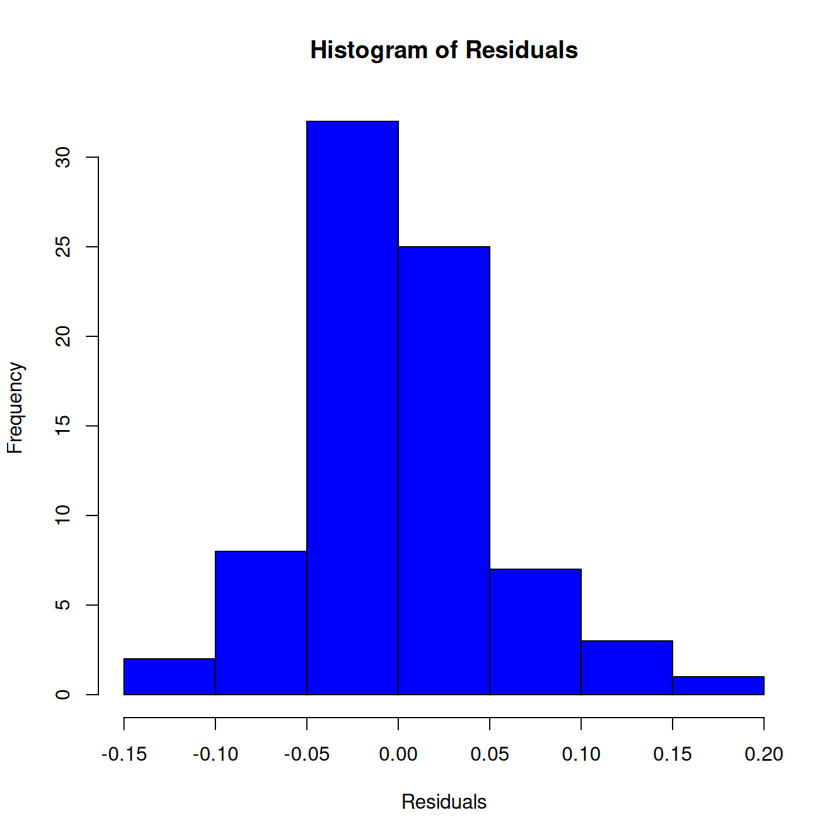

In [49]:
test_paf_3_resids <- psych::factor.residuals(corr_matrix, test_paf_3$loadings)
test_paf_3_resids <- as.matrix(test_paf_3_resids[upper.tri(test_paf_3_resids)])
sum(abs(test_paf_3_resids) > 0.05)
round(sum(abs(test_paf_3_resids) > 0.05)/nrow(test_paf_3_resids), 3)
round(sqrt(mean(test_paf_3_resids)), 3)
par(bg = "white")
hist(test_paf_3_resids, main = "Histogram of Residuals", xlab = "Residuals", col = "blue")

**Rotation Analysis**

In [57]:
test_paf3_orthogonal <- psych::fa(corr_matrix, nfactors = 3, fm = 'pa', rotate = 'varimax', max.iter = 1000)
psych::print.psych(test_paf3_orthogonal, cut = 0.3, sort = TRUE)

Factor Analysis using method =  pa
Call: psych::fa(r = corr_matrix, nfactors = 3, rotate = "varimax", 
    max.iter = 1000, fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
      item   PA1   PA3   PA2   h2   u2 com
Q2_4     4  0.60             0.41 0.59 1.3
Q2_5     5  0.59             0.38 0.62 1.2
Q2_6     6  0.52             0.30 0.70 1.2
Q2_3     3  0.45        0.38 0.43 0.57 2.6
Q2_9     9  0.45  0.40       0.42 0.58 2.5
Q2_7     7  0.37             0.26 0.74 2.4
Q2_8     8        0.78       0.62 0.38 1.0
Q2_12   12        0.44       0.21 0.79 1.2
Q2_13   13  0.35  0.41  0.31 0.38 0.62 2.8
Q2_10   10  0.38  0.40       0.32 0.68 2.2
Q2_11   11        0.37       0.21 0.79 2.0
Q2_1     1              0.83 0.75 0.25 1.2
Q2_2     2              0.45 0.24 0.76 1.3

                       PA1  PA3  PA2
SS loadings           1.88 1.66 1.39
Proportion Var        0.14 0.13 0.11
Cumulative Var        0.14 0.27 0.38
Proportion Explained  0.38 0.34 0.28
Cumulati

In [55]:
test_paf3_oblique <- psych::fa(corr_matrix, nfactors = 3, fm = 'pa', rotate = 'oblimin', max.iter = 1000)
psych::print.psych(test_paf3_oblique, cut = 0.3, sort = TRUE)

Factor Analysis using method =  pa
Call: psych::fa(r = corr_matrix, nfactors = 3, rotate = "oblimin", 
    max.iter = 1000, fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
      item   PA1   PA3   PA2   h2   u2 com
Q2_4     4  0.66             0.41 0.59 1.2
Q2_5     5  0.62             0.38 0.62 1.2
Q2_6     6  0.55             0.30 0.70 1.1
Q2_3     3  0.47             0.43 0.57 1.7
Q2_9     9  0.45             0.42 0.58 1.7
Q2_7     7  0.39             0.26 0.74 1.5
Q2_10   10  0.38  0.31       0.32 0.68 1.9
Q2_13   13  0.34             0.38 0.62 2.6
Q2_8     8        0.79       0.62 0.38 1.0
Q2_12   12        0.42       0.21 0.79 1.1
Q2_11   11        0.30       0.21 0.79 1.9
Q2_1     1              0.86 0.75 0.25 1.0
Q2_2     2              0.43 0.24 0.76 1.5

                       PA1  PA3  PA2
SS loadings           2.28 1.37 1.28
Proportion Var        0.18 0.11 0.10
Cumulative Var        0.18 0.28 0.38
Proportion Explained  0.46 0.28 0.26
Cumulati

## 2 Factors

In [41]:
test_paf_2 <- psych::fa(corr_matrix, nfactors = 2, fm = 'pa', rotate = 'none', max.iter = 1000)
test_paf_2

Factor Analysis using method =  pa
Call: psych::fa(r = corr_matrix, nfactors = 2, rotate = "none", max.iter = 1000, 
    fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
       PA1   PA2   h2   u2 com
Q2_1  0.47  0.30 0.32 0.68 1.7
Q2_2  0.34  0.09 0.13 0.87 1.1
Q2_3  0.64 -0.01 0.41 0.59 1.0
Q2_4  0.50 -0.38 0.39 0.61 1.9
Q2_5  0.48 -0.33 0.34 0.66 1.8
Q2_6  0.47 -0.32 0.32 0.68 1.8
Q2_7  0.49 -0.07 0.25 0.75 1.0
Q2_8  0.50  0.33 0.36 0.64 1.7
Q2_9  0.65  0.00 0.42 0.58 1.0
Q2_10 0.55  0.00 0.30 0.70 1.0
Q2_11 0.44  0.09 0.20 0.80 1.1
Q2_12 0.37  0.21 0.18 0.82 1.6
Q2_13 0.62  0.12 0.40 0.60 1.1

                       PA1  PA2
SS loadings           3.39 0.63
Proportion Var        0.26 0.05
Cumulative Var        0.26 0.31
Proportion Explained  0.84 0.16
Cumulative Proportion 0.84 1.00

Mean item complexity =  1.4
Test of the hypothesis that 2 factors are sufficient.

df null model =  78  with the objective function =  3.18
df of  the model are 53  and th

**Analysis of Residuals**

[1] 33

[1] 0.423

[1] 0.024

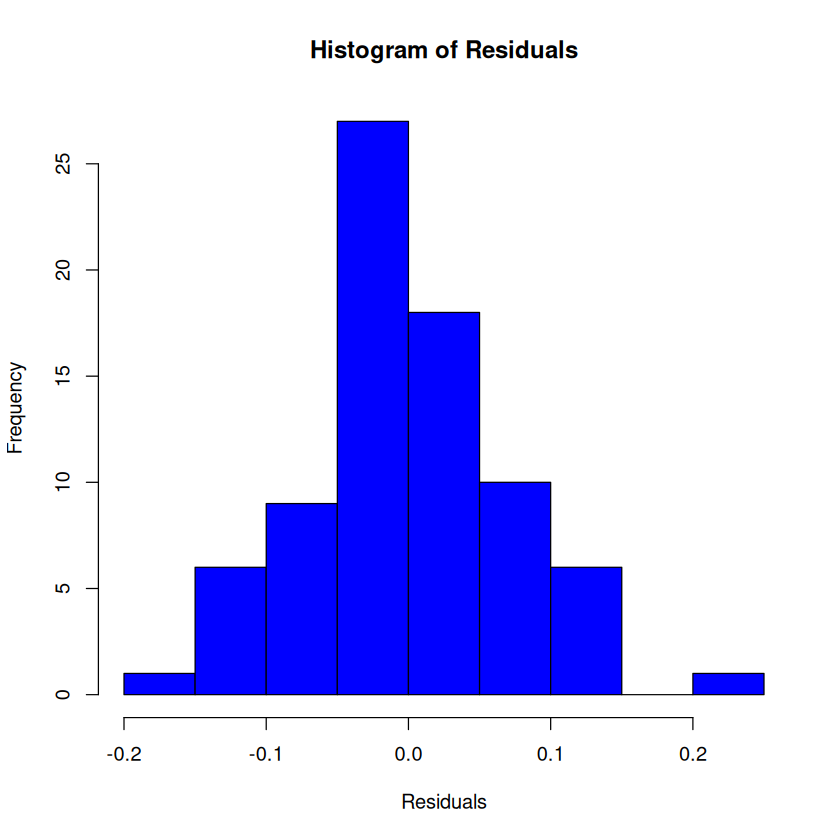

In [50]:
test_paf_2_resids <- psych::factor.residuals(corr_matrix, test_paf_2$loadings)
test_paf_2_resids <- as.matrix(test_paf_2_resids[upper.tri(test_paf_2_resids)])
sum(abs(test_paf_2_resids) > 0.05)
round(sum(abs(test_paf_2_resids) > 0.05)/nrow(test_paf_2_resids), 3)
round(sqrt(mean(test_paf_2_resids)), 3)
par(bg = "white")
hist(test_paf_2_resids, main = "Histogram of Residuals", xlab = "Residuals", col = "blue")

**Rotation Analysis**

In [58]:
test_paf2_orthogonal <- psych::fa(corr_matrix, nfactors = 2, fm = 'pa', rotate = 'varimax', max.iter = 1000)
psych::print.psych(test_paf2_orthogonal, cut = 0.3, sort = TRUE)

Factor Analysis using method =  pa
Call: psych::fa(r = corr_matrix, nfactors = 2, rotate = "varimax", 
    max.iter = 1000, fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
      item  PA1  PA2   h2   u2 com
Q2_8     8 0.60      0.36 0.64 1.0
Q2_1     1 0.55      0.32 0.68 1.1
Q2_13   13 0.54 0.33 0.40 0.60 1.6
Q2_9     9 0.49 0.43 0.42 0.58 2.0
Q2_3     3 0.47 0.44 0.41 0.59 2.0
Q2_12   12 0.42      0.18 0.82 1.1
Q2_10   10 0.40 0.37 0.30 0.70 2.0
Q2_11   11 0.39      0.20 0.80 1.6
Q2_2     2 0.32      0.13 0.87 1.5
Q2_4     4      0.61 0.39 0.61 1.1
Q2_5     5      0.56 0.34 0.66 1.1
Q2_6     6      0.55 0.32 0.68 1.1
Q2_7     7 0.32 0.38 0.25 0.75 1.9

                       PA1  PA2
SS loadings           2.16 1.86
Proportion Var        0.17 0.14
Cumulative Var        0.17 0.31
Proportion Explained  0.54 0.46
Cumulative Proportion 0.54 1.00

Mean item complexity =  1.5
Test of the hypothesis that 2 factors are sufficient.

df null model =  78  with the

In [59]:
test_paf2_oblique <- psych::fa(corr_matrix, nfactors = 2, fm = 'pa', rotate = 'oblimin', max.iter = 1000)
psych::print.psych(test_paf2_oblique, cut = 0.3, sort = TRUE)

Factor Analysis using method =  pa
Call: psych::fa(r = corr_matrix, nfactors = 2, rotate = "oblimin", 
    max.iter = 1000, fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
      item   PA1   PA2   h2   u2 com
Q2_8     8  0.66       0.36 0.64 1.1
Q2_1     1  0.61       0.32 0.68 1.1
Q2_13   13  0.53       0.40 0.60 1.2
Q2_12   12  0.45       0.18 0.82 1.0
Q2_9     9  0.44       0.42 0.58 1.8
Q2_3     3  0.42  0.31 0.41 0.59 1.8
Q2_11   11  0.39       0.20 0.80 1.2
Q2_10   10  0.37       0.30 0.70 1.8
Q2_2     2  0.32       0.13 0.87 1.1
Q2_4     4        0.63 0.39 0.61 1.0
Q2_5     5        0.58 0.34 0.66 1.0
Q2_6     6        0.56 0.32 0.68 1.0
Q2_7     7        0.30 0.25 0.75 2.0

                       PA1  PA2
SS loadings           2.34 1.68
Proportion Var        0.18 0.13
Cumulative Var        0.18 0.31
Proportion Explained  0.58 0.42
Cumulative Proportion 0.58 1.00

 With factor correlations of 
     PA1  PA2
PA1 1.00 0.52
PA2 0.52 1.00

Mean item c

## 1 Factor

In [42]:
test_paf_1 <- psych::fa(corr_matrix, nfactors = 1, fm = 'pa', rotate = 'none', max.iter = 1000)
test_paf_1

Factor Analysis using method =  pa
Call: psych::fa(r = corr_matrix, nfactors = 1, rotate = "none", max.iter = 1000, 
    fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
       PA1   h2   u2 com
Q2_1  0.46 0.22 0.78   1
Q2_2  0.35 0.12 0.88   1
Q2_3  0.65 0.42 0.58   1
Q2_4  0.48 0.23 0.77   1
Q2_5  0.47 0.22 0.78   1
Q2_6  0.45 0.20 0.80   1
Q2_7  0.50 0.25 0.75   1
Q2_8  0.49 0.24 0.76   1
Q2_9  0.66 0.43 0.57   1
Q2_10 0.55 0.30 0.70   1
Q2_11 0.44 0.20 0.80   1
Q2_12 0.36 0.13 0.87   1
Q2_13 0.63 0.39 0.61   1

                PA1
SS loadings    3.34
Proportion Var 0.26

Mean item complexity =  1
Test of the hypothesis that 1 factor is sufficient.

df null model =  78  with the objective function =  3.18
df of  the model are 65  and the objective function was  0.96 

The root mean square of the residuals (RMSR) is  0.08 
The df corrected root mean square of the residuals is  0.09 

Fit based upon off diagonal values = 0.9
Measures of factor score adeq

**Analysis of Residuals**

[1] 40

[1] 0.513

[1] 0.024

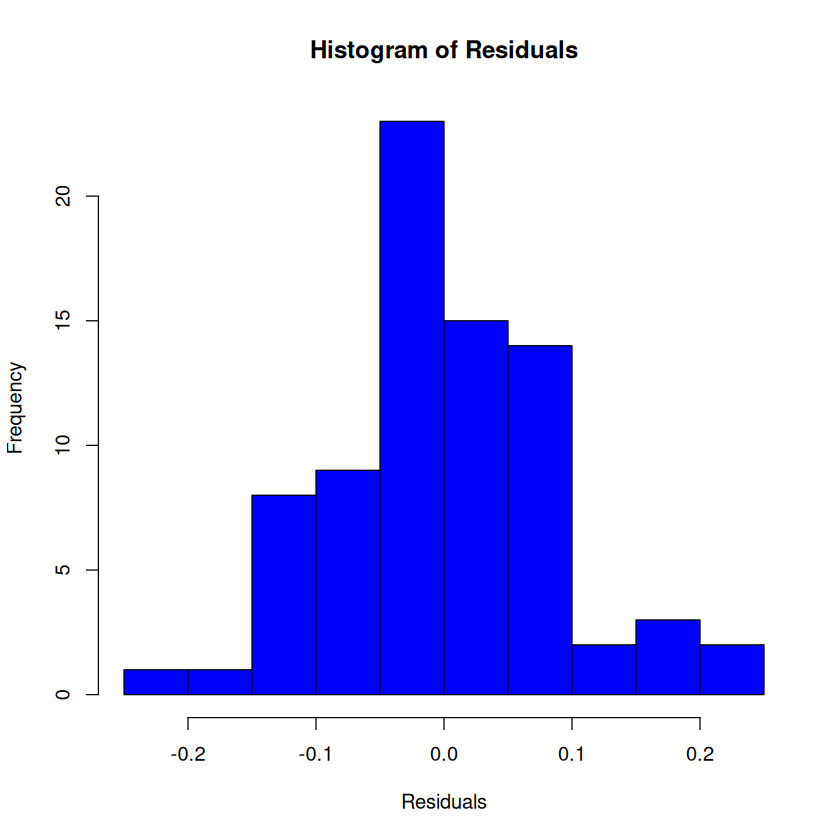

In [51]:
test_paf_1_resids <- psych::factor.residuals(corr_matrix, test_paf_1$loadings)
test_paf_1_resids <- as.matrix(test_paf_1_resids[upper.tri(test_paf_1_resids)])
sum(abs(test_paf_1_resids) > 0.05)
round(sum(abs(test_paf_1_resids) > 0.05)/nrow(test_paf_1_resids), 3)
round(sqrt(mean(test_paf_1_resids)), 3)
par(bg = "white")
hist(test_paf_1_resids, main = "Histogram of Residuals", xlab = "Residuals", col = "blue")

**Rotation Analysis**

In [60]:
test_paf1_orthogonal <- psych::fa(corr_matrix, nfactors = 1, fm = 'pa', rotate = 'varimax', max.iter = 1000)
psych::print.psych(test_paf1_orthogonal, cut = 0.3, sort = TRUE)

Factor Analysis using method =  pa
Call: psych::fa(r = corr_matrix, nfactors = 1, rotate = "varimax", 
    max.iter = 1000, fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
       V  PA1   h2   u2 com
Q2_9   9 0.66 0.43 0.57   1
Q2_3   3 0.65 0.42 0.58   1
Q2_13 13 0.63 0.39 0.61   1
Q2_10 10 0.55 0.30 0.70   1
Q2_7   7 0.50 0.25 0.75   1
Q2_8   8 0.49 0.24 0.76   1
Q2_4   4 0.48 0.23 0.77   1
Q2_5   5 0.47 0.22 0.78   1
Q2_1   1 0.46 0.22 0.78   1
Q2_6   6 0.45 0.20 0.80   1
Q2_11 11 0.44 0.20 0.80   1
Q2_12 12 0.36 0.13 0.87   1
Q2_2   2 0.35 0.12 0.88   1

                PA1
SS loadings    3.34
Proportion Var 0.26

Mean item complexity =  1
Test of the hypothesis that 1 factor is sufficient.

df null model =  78  with the objective function =  3.18
df of  the model are 65  and the objective function was  0.96 

The root mean square of the residuals (RMSR) is  0.08 
The df corrected root mean square of the residuals is  0.09 

Fit based upon off diagon

In [61]:
test_paf1_oblique <- psych::fa(corr_matrix, nfactors = 1, fm = 'pa', rotate = 'oblimin', max.iter = 1000)
psych::print.psych(test_paf1_oblique, cut = 0.3, sort = TRUE)

Factor Analysis using method =  pa
Call: psych::fa(r = corr_matrix, nfactors = 1, rotate = "oblimin", 
    max.iter = 1000, fm = "pa")
Standardized loadings (pattern matrix) based upon correlation matrix
       V  PA1   h2   u2 com
Q2_9   9 0.66 0.43 0.57   1
Q2_3   3 0.65 0.42 0.58   1
Q2_13 13 0.63 0.39 0.61   1
Q2_10 10 0.55 0.30 0.70   1
Q2_7   7 0.50 0.25 0.75   1
Q2_8   8 0.49 0.24 0.76   1
Q2_4   4 0.48 0.23 0.77   1
Q2_5   5 0.47 0.22 0.78   1
Q2_1   1 0.46 0.22 0.78   1
Q2_6   6 0.45 0.20 0.80   1
Q2_11 11 0.44 0.20 0.80   1
Q2_12 12 0.36 0.13 0.87   1
Q2_2   2 0.35 0.12 0.88   1

                PA1
SS loadings    3.34
Proportion Var 0.26

Mean item complexity =  1
Test of the hypothesis that 1 factor is sufficient.

df null model =  78  with the objective function =  3.18
df of  the model are 65  and the objective function was  0.96 

The root mean square of the residuals (RMSR) is  0.08 
The df corrected root mean square of the residuals is  0.09 

Fit based upon off diagon